# Part I - (201902-fordgobike-tripdata)
## by (sheila nyakara)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the year 2019 in february


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install h3
!pip install haversine
!pip install geopy
import h3
import datetime

In [2]:
# load the data 
data=pd.read_csv("201902-fordgobike-tripdata.csv")
data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


# exploration of the data

In [3]:
#explore the shape of the data 
data.shape

(183412, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# check for missing values 
data.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# check for data types 
data.dtypes
# the variables start time,endtime ,start station id ,end station id and member birth year have the wrong datatypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
# drop the missing data 
data.dropna(axis=0, how='any',inplace=True)
data.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
# change duration sec to time ,start_time,end_timet to datetime 
data['start_time']=data['start_time'].astype('datetime64[ns]')
data['end_time']=data['end_time'].astype('datetime64[ns]')
#change the features station id ,and member birth year to integers 
data['start_station_id']=data['start_station_id'].astype('int64')
data['end_station_id']=data['end_station_id'].astype('int64')
data['member_birth_year']=data['member_birth_year'].astype('int64')

In [9]:
# check corrected data types
data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [10]:
data.shape

(174952, 16)

In [11]:
# check for duplicates
data.duplicated().sum()

0

In [12]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [13]:
# extract the year 
data['year']=pd.to_datetime(data['start_time']).dt.year

In [14]:
# create a variable called age from the column member_birth_year
data['age'] = data['year']- data['member_birth_year']
# view the age columns and its values
data.age.value_counts()


31     10214
26      9323
30      8967
29      8640
28      8484
       ...  
92         1
91         1
109        1
89         1
141        1
Name: age, Length: 75, dtype: int64

In [15]:
# create a column for day of the week when the trip started and ended 

data['start_day']=data['start_time'].dt.day_name()

data['end_day']=data['end_time'].dt.day_name()


In [16]:
# compute the distance in miles between stations using latitude and longitudes

import haversine #import the package haversine 
def haversine_vectorize(start_station_longitude,start_station_latitude,end_station_longitude,end_station_latitude):

    start_station_longitude,start_station_latitude,end_station_longitude,end_station_latitude = map(np.radians, [start_station_longitude,start_station_latitude,end_station_longitude,end_station_latitude])

    newlon = end_station_longitude - start_station_longitude
    newlat = end_station_latitude - start_station_latitude

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(start_station_latitude) * np.cos(end_station_latitude) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    miles =3963.1676 * dist #6367 for distance in KM 
    return miles

In [17]:
# call the function haversine_vectorize to create a new column called distance 
data['distance']=haversine_vectorize(data['start_station_latitude'],data['start_station_longitude'],data['end_station_latitude'], data['end_station_longitude'])

In [18]:
data.distance.describe()

count    174952.000000
mean          0.920163
std           0.646360
min           0.000000
25%           0.479523
50%           0.745553
75%           1.206500
max          39.687780
Name: distance, dtype: float64

In [19]:
data.query('distance==0')


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,age,start_day,end_day,distance
19,874,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,180,Telegraph Ave at 23rd St,37.812678,-122.268773,180,Telegraph Ave at 23rd St,37.812678,...,5629,Customer,1978,Male,No,2019,41,Thursday,Thursday,0.0
27,408,2019-02-28 23:48:08.282,2019-02-28 23:54:56.930,78,Folsom St at 9th St,37.773717,-122.411647,78,Folsom St at 9th St,37.773717,...,5410,Subscriber,1982,Male,No,2019,37,Thursday,Thursday,0.0
34,471,2019-02-28 23:42:43.361,2019-02-28 23:50:34.446,133,Valencia St at 22nd St,37.755213,-122.420975,133,Valencia St at 22nd St,37.755213,...,5559,Subscriber,1992,Male,No,2019,27,Thursday,Thursday,0.0
55,3478,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,...,1846,Subscriber,1995,Male,No,2019,24,Thursday,Thursday,0.0
56,3140,2019-02-28 22:44:53.503,2019-02-28 23:37:14.090,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,...,3040,Subscriber,1983,Female,No,2019,36,Thursday,Thursday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183317,1476,2019-02-01 02:45:04.744,2019-02-01 03:09:41.184,345,Hubbell St at 16th St,37.766483,-122.398279,345,Hubbell St at 16th St,37.766483,...,5224,Subscriber,1967,Male,No,2019,52,Friday,Friday,0.0
183318,877,2019-02-01 02:53:15.995,2019-02-01 03:07:53.058,385,Woolsey St at Sacramento St,37.850578,-122.278175,385,Woolsey St at Sacramento St,37.850578,...,4913,Subscriber,1987,Male,No,2019,32,Friday,Friday,0.0
183326,5713,2019-02-01 01:02:55.168,2019-02-01 02:38:09.002,31,Raymond Kimbell Playground,37.783813,-122.434559,31,Raymond Kimbell Playground,37.783813,...,5366,Subscriber,1972,Male,No,2019,47,Friday,Friday,0.0
183350,874,2019-02-01 01:41:43.414,2019-02-01 01:56:17.552,253,Haste St at College Ave,37.866418,-122.253799,253,Haste St at College Ave,37.866418,...,3232,Subscriber,1995,Male,Yes,2019,24,Friday,Friday,0.0


the minimum distance covered showed is zero which cannot be posssible

In [20]:
# drop distance is equal to 0
data.drop(data[data['distance'] == 0].index, inplace = True)

In [21]:
#check for change
data.distance.describe()

count    171494.000000
mean          0.938717
std           0.639366
min           0.009499
25%           0.492694
50%           0.758100
75%           1.217378
max          39.687780
Name: distance, dtype: float64

In [22]:
#find the speed 
data['speed']= data['distance']/data['duration_sec']
data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,age,start_day,end_day,distance,speed
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,2019,35,Thursday,Friday,0.224684,0.000004
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2019,47,Thursday,Friday,1.643101,0.000027
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,2019,30,Thursday,Friday,0.165807,0.000005
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,2019,45,Thursday,Friday,1.647190,0.001039
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,2019,60,Thursday,Friday,1.445003,0.000806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,...,Subscriber,1996,Male,No,2019,23,Friday,Friday,1.152821,0.002402
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,...,Subscriber,1984,Male,No,2019,35,Friday,Friday,0.688694,0.002200
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,...,Subscriber,1990,Male,Yes,2019,29,Friday,Friday,0.263435,0.001868
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,...,Subscriber,1988,Male,No,2019,31,Friday,Friday,0.286334,0.002060


In [23]:
# exract the time trip started and ended
data['s_time'] = pd.to_datetime(data['start_time'])
data['e_time'] = pd.to_datetime(data['end_time'])
data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,year,age,start_day,end_day,distance,speed,s_time,e_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Male,No,2019,35,Thursday,Friday,0.224684,0.000004,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019,47,Thursday,Friday,1.643101,0.000027,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Other,No,2019,30,Thursday,Friday,0.165807,0.000005,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Male,Yes,2019,45,Thursday,Friday,1.647190,0.001039,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Male,No,2019,60,Thursday,Friday,1.445003,0.000806,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,...,Male,No,2019,23,Friday,Friday,1.152821,0.002402,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,...,Male,No,2019,35,Friday,Friday,0.688694,0.002200,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,...,Male,Yes,2019,29,Friday,Friday,0.263435,0.001868,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,...,Male,No,2019,31,Friday,Friday,0.286334,0.002060,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287


In [24]:
# create a function to categorise time of day as morning,afternoon,evening and night
def ftod(x):
    if (x>=16) & (x<=18):
        tod = 'evening'
    elif (x>=6) & (x<12):
        tod = 'morning'
    elif (x>=12) & (x<16):
        tod = 'afternoon'
    else:
        tod = 'night'
    return tod
data['s_time'] = data.start_time.dt.hour.map(ftod) 
data['e_time'] = data.end_time.dt.hour.map(ftod) 
data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,year,age,start_day,end_day,distance,speed,s_time,e_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Male,No,2019,35,Thursday,Friday,0.224684,0.000004,evening,morning
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019,47,Thursday,Friday,1.643101,0.000027,afternoon,night
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Other,No,2019,30,Thursday,Friday,0.165807,0.000005,evening,night
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Male,Yes,2019,45,Thursday,Friday,1.647190,0.001039,night,night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Male,No,2019,60,Thursday,Friday,1.445003,0.000806,night,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,...,Male,No,2019,23,Friday,Friday,1.152821,0.002402,night,night
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,...,Male,No,2019,35,Friday,Friday,0.688694,0.002200,night,night
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,...,Male,Yes,2019,29,Friday,Friday,0.263435,0.001868,night,night
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,...,Male,No,2019,31,Friday,Friday,0.286334,0.002060,night,night


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171494 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171494 non-null  int64         
 1   start_time               171494 non-null  datetime64[ns]
 2   end_time                 171494 non-null  datetime64[ns]
 3   start_station_id         171494 non-null  int64         
 4   start_station_name       171494 non-null  object        
 5   start_station_latitude   171494 non-null  float64       
 6   start_station_longitude  171494 non-null  float64       
 7   end_station_id           171494 non-null  int64         
 8   end_station_name         171494 non-null  object        
 9   end_station_latitude     171494 non-null  float64       
 10  end_station_longitude    171494 non-null  float64       
 11  bike_id                  171494 non-null  int64         
 12  user_type       

# What is the structure of your dataset?
There are 174952 users in the dataset with 20 features with 3 categorical variables . other features were introduced during the data wrangling process such as age,speed,distance,s_time and e_time and features on time of day and day of week

# what is/are the main feature(s) of interest in your dataset?
the project is focused on finding out what time of day and day of the week are most of the trips made and if the users are customers or subscribers

# what features in the dataset do you think will help support your investigation into your feature(s) of interest?
features of interest will be  age ,type of users ,start_time and start_day which are features that will be exracted from the original data

## Univariate Exploration






# When are most trips taken in terms of time of day, day of the week

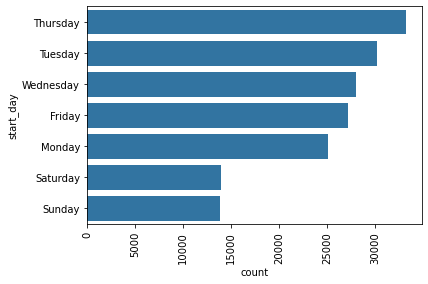

In [26]:
order = data['start_day'].value_counts().index
base_color=sns.color_palette()[0]
sns.countplot(data=data, y='start_day', color=base_color,order=order);
plt.xticks(rotation=90)
plt.xlabel('count')
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 10,5


most trips seems to take place on the weekdays more than the weekends . which may imply a lot of the users use the service for work or school

# Time when most trips happen

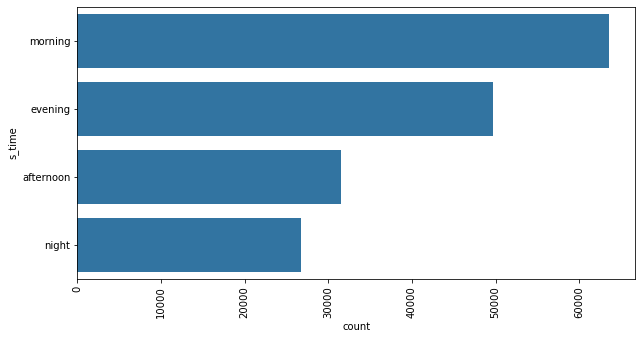

In [27]:
order = data['s_time'].value_counts().index
base_color=sns.color_palette()[0]
sns.countplot(data=data, y='s_time', color=base_color,order=order);
plt.xticks(rotation=90)
plt.xlabel('count')
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 10,5

the weekdays (monday,tuesday,wednesday,thursday and friday) has more users than the weekends .most trips happen also in the mornings and evenings in the weekdays which implies a majority of the users use the service to go to work or school

# the distribution of time in minutes 

In [28]:
# create a column for time in minutes
data['duration_minutes']=data['duration_sec']/60

C:\Users\sa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


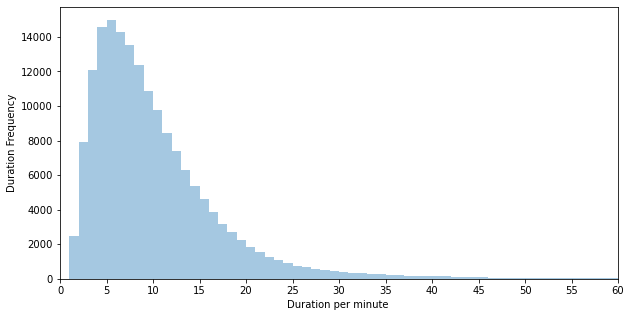

In [29]:
# plottimg the data
ticks = list(range(61))
bins = np.arange(0,data.duration_minutes.max()+5)
sns.distplot(data.duration_minutes,bins = bins , kde=False);
plt.xlim((0,60));
plt.xticks(ticks[::5])
plt.xlabel('Duration per minute ')
plt.ylabel("Duration Frequency");

the distribution of time in minutes is rightly skewed which implies that a lot of users do use the bike serice for short durations with an  average of between 5 and 10 minutes.

# what gender uses the bike services more

Text(0.5, 0, 'count')

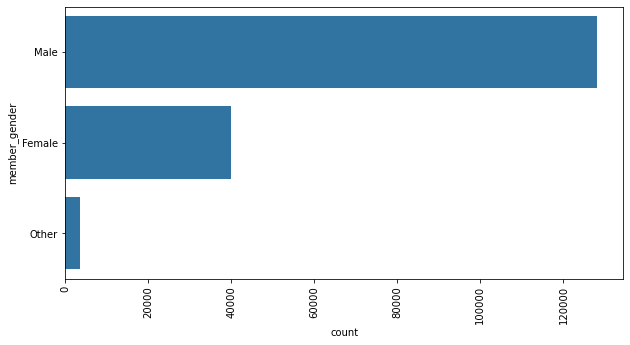

In [30]:
#use countplot
order = data['member_gender'].value_counts().index
base_color=sns.color_palette()[0]
sns.countplot(data=data, y='member_gender', color=base_color,order=order);
plt.xticks(rotation=90)
plt.xlabel('count')

a majority of the members using the bike service are males 

# distribution of the age

In [31]:
# exploration of the feature age 
data['age'].describe()


count    171494.000000
mean         34.195278
std          10.084265
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

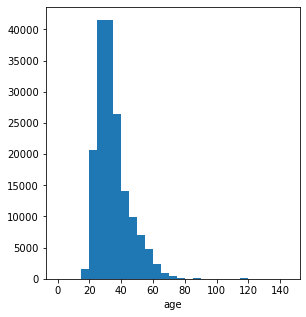

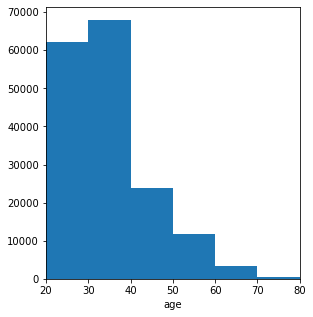

In [32]:
# plotting the data
plt.figure(figsize = [10, 5])
# histogram on left: full data
plt.subplot(1, 2, 1)
# Create bins with step-size 5
bins = np.arange(0, data['age'].max()+5, 5)
plt.hist(data = data, x = 'age',bins=bins);
plt.xlabel('age')
plt.show()
# histogram on right: focus in on distribution of data < 80
plt.subplot(1, 2, 2)
bins = np.arange(0, data['age'].max()+10,10)
plt.hist(data=data, x='age', bins = bins)
plt.xlim([20,80])
plt.xlabel('age')
plt.show()

the histogram depicts the distribution of the ages of those using the bike service is left skewed with fairly few points above the age of 80 which may indicate a lot of the people aged between 30 and 40 use the service more
there are a few outliers in the range above 80 years 

# bike share for all trip

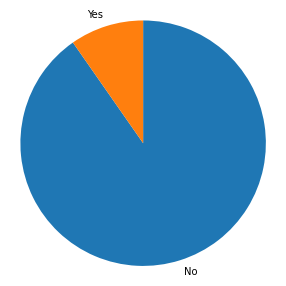

In [33]:
# plotting of the data
data1=data['bike_share_for_all_trip'].value_counts()
plt.figure(figsize = [12, 5])
plt.pie(data1,labels = data1.index, startangle = 90,counterclock = False);
plt.axis('square');

a majority of the users do not share the rides ,

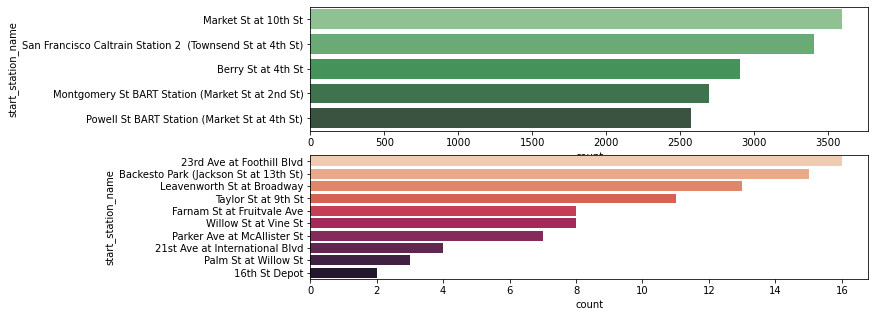

In [34]:
#plotting the top 5 start stations & the least 10 start stations 
plt.subplot(2,1,1) 
sns.countplot(data=data , y="start_station_name", palette="Greens_d",order=data.start_station_name.value_counts().iloc[:5].index)
plt.subplot(2, 1, 2)          
sns.countplot(data=data , y="start_station_name", palette="rocket_r",order=data.start_station_name.value_counts().iloc[-10:].index)
plt.show()

most of the trips are made from the market st at 1oth st which implies that more bikes should be added in the station to accomodate many of the users

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> from the exploration , it was determined that a lot of the users use the bikes service during the weekdays and in the morning hours to go to work and run erands . a lot of users use bike from the station in market st at 10th st which means more bikes should be added and provide maintanance  services.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i did some wrangling and cleaned the data. also exracted new features such as start and end day, time in minutes,distance and speed . there were some outliers shown also in the age of the users 

## Bivariate Exploration



In [35]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,year,age,distance,speed,duration_minutes
count,171494.000000,171494.000000,171494.000000,171494.000000,171494.000000,171494.000000,171494.000000,171494.000000,171494.000000,171494.0,171494.000000,171494.000000,1.714940e+05,171494.000000
mean,682.107461,138.318676,37.771502,-122.352280,135.872689,37.771700,-122.351846,4482.423822,1984.804722,2019.0,34.195278,0.938717,1.691836e-03,11.368458
std,1534.333862,111.249829,0.099576,0.116942,110.913567,0.099477,0.116494,1659.993750,10.084265,0.0,10.084265,0.639366,7.420604e-04,25.572231
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,2019.0,18.000000,0.009499,8.505617e-07,1.016667
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3796.000000,1980.000000,2019.0,27.000000,0.492694,1.156501e-03,5.383333
50%,508.000000,104.000000,37.780760,-122.398279,100.000000,37.781010,-122.397437,4962.000000,1987.000000,2019.0,32.000000,0.758100,1.599778e-03,8.466667
75%,779.000000,239.000000,37.797320,-122.283127,232.000000,37.797320,-122.287610,5506.000000,1992.000000,2019.0,39.000000,1.217378,2.171890e-03,12.983333
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2019.0,141.000000,39.687780,5.928488e-03,1409.133333


# Relationship between the age of the users and their speed 

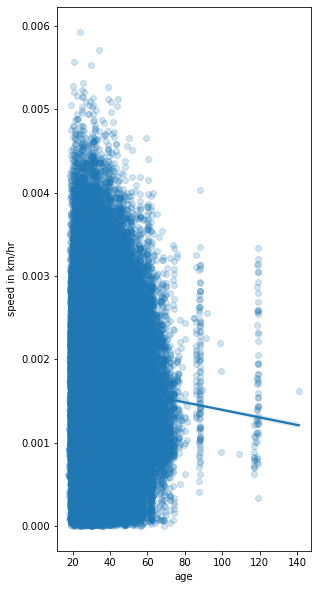

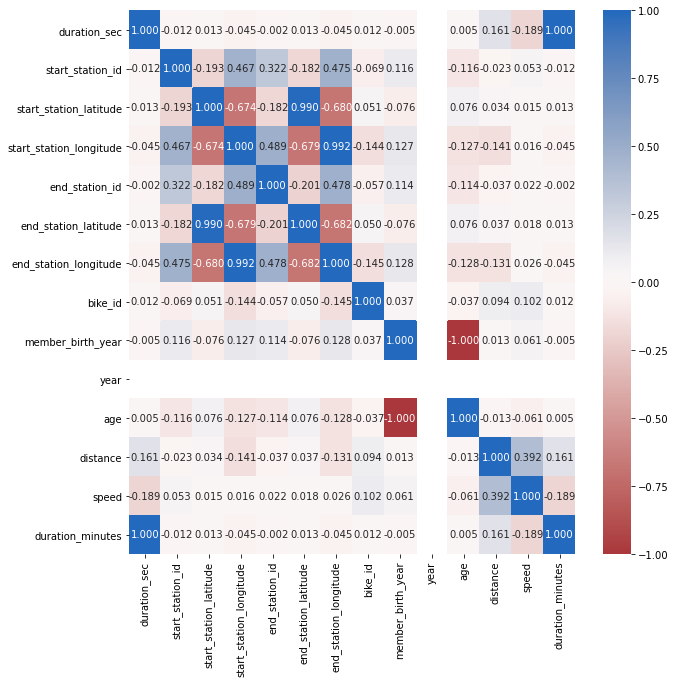

In [36]:
#scatter plot on left
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
sns.regplot(data = data, x = 'age', y = 'speed',x_jitter=0.3,scatter_kws={'alpha':1/5});
plt.xlabel('age')
plt.ylabel('speed in km/hr')
#heat maps on right
plt.figure(figsize = [10,10])
sns.heatmap(data.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()


from the scatter plot there is a slight relationship that can be observed. the older the user the less the speed they have . from the heatmap , it shows therelationship between age and speed is a weak negative relationship with a value of -0.058 

# what type of the users( customers and which ones are subscribers) have the longest duration of use

In [37]:
data.distance.describe()

count    171494.000000
mean          0.938717
std           0.639366
min           0.009499
25%           0.492694
50%           0.758100
75%           1.217378
max          39.687780
Name: distance, dtype: float64

Text(0, 0.5, 'duration in minutes')

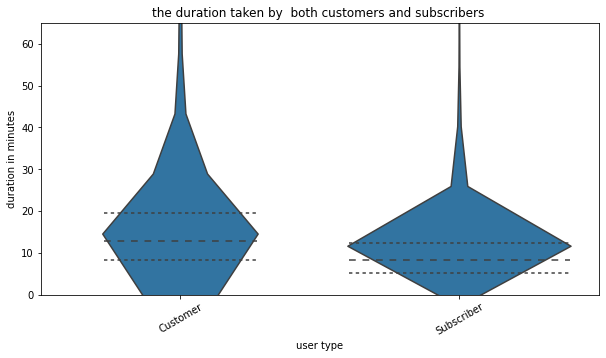

In [38]:
base_color = sns.color_palette()[0]
sns.violinplot(data=data, x='user_type', y='duration_minutes', color=base_color, inner='quartile')
plt.xticks(rotation=30);
plt.ylim([0,65])
plt.title('the duration taken by  both customers and subscribers ')
plt.xlabel('user type')
plt.ylabel('duration in minutes')

the duration of both the customers and subscribers seeem to range between the duration of 10 and 30 minutes which implies the bikes are mostly used for short distances.

# user type with the longest distance travel

Text(0, 0.5, 'user type')

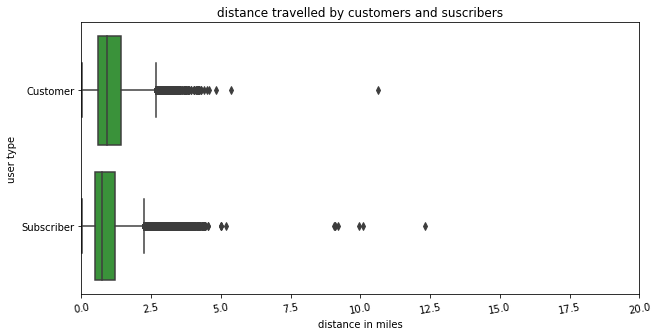

In [39]:
# plotting using violin plots 
base_color = sns.color_palette()[2] 
sns.boxplot(data=data, y='user_type', x='distance', color=base_color)
plt.xlim([0,20])
plt.xticks(rotation=10);
plt.title('distance travelled by customers and suscribers')
plt.xlabel('distance in miles')
plt.ylabel('user type')

the customers cover slightly greater DISTANCES that the subscribers

# distribution of age by gender of the users

Text(0.5, 1.0, 'Age by member_gender')

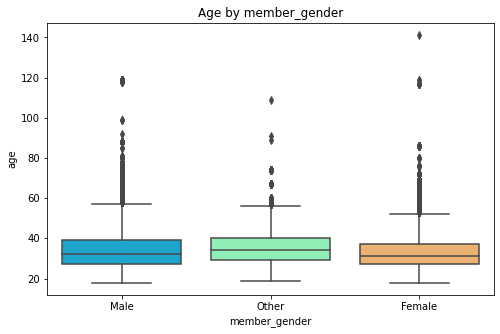

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='member_gender',y='age',data=data, palette='rainbow')
plt.title("Age by member_gender")

the male gender are the majority with the median of 38 years, the femle gender are a little bit fewer compared to the males however there is no significant difference .

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

the subscribers use the bike services for slightly short duration as compared to the customers. also the male gender seem to be the majority of the users ranging in the ages 20 and 30

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> from the scatter plot there is a slight relationship that can be observed. the older the user the less the speed they have . from the heatmap , it shows therelationship between age and speed is a weak negative relationship with a value of -0.058

## Multivariate Exploration



# the duration of a trip on a day per user type

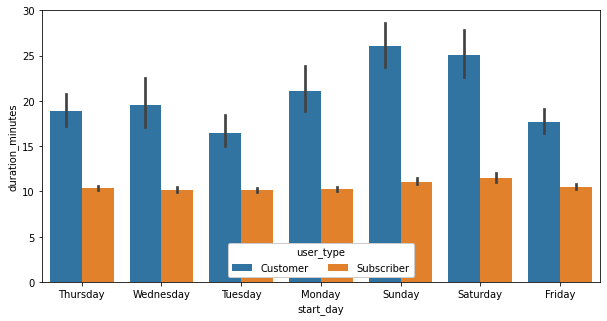

In [41]:
ax = sns.barplot(data = data, x = 'start_day', y = 'duration_minutes', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')

the customers take more time during the weekends more than the subscribers 

# relationship between age of the user ,duration of travel in a particular time of day

In [42]:
data.duration_minutes.describe()

count    171494.000000
mean         11.368458
std          25.572231
min           1.016667
25%           5.383333
50%           8.466667
75%          12.983333
max        1409.133333
Name: duration_minutes, dtype: float64

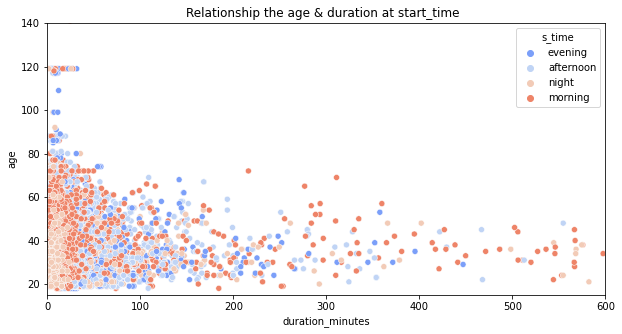

In [43]:
#plotting Relationship the age & duration per each User_Type 
sns.scatterplot(data = data, x ='duration_minutes' , y ='age' , hue ='s_time',palette = "coolwarm")
plt.ylim((15,140))
plt.xlim((0,600))
plt.title("Relationship the age & duration at start_time  ")
plt.show()

there is a negative relationship between age of the user and the duration in minutes. a lot of the trips seems to be taken in the mornings and for very short durations

C:\Users\sa\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


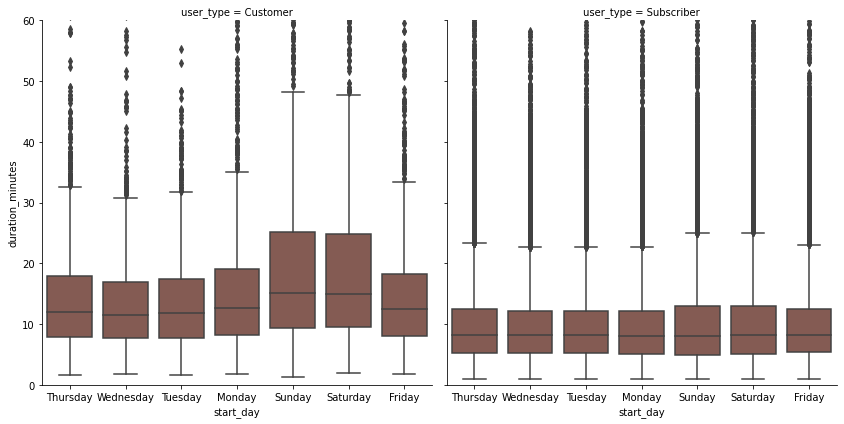

In [44]:
#using facetting to see the distribution of both duration along the days of the week for both customer and subscriber
base_color = sns.color_palette()[5]
g = sns.FacetGrid(data = data, col = "user_type", height = 6 )
g.map(sns.boxplot,"start_day",'duration_minutes', color = base_color)
plt.ylim((0,60))
plt.show()

the subscribers seem to be uniformly distributed as they mostly use the service to commute to work and maybe school, for the customers users, there seems to be a hike in the weekends which implies they use the service for pleasure or sport 

## Conclusions
> from the dataset, most of the trips are done on weekdays and mostly in the morning and evening when most people are going to and from work. most of these users are subscribers and between the ages 20 and 30, however the customers seem to be using the service more on weekends and for a longer period of time than the subscribers which may indicate most of the customers use the bikes for sports or pleasure


In [46]:
data.to_csv("new_fordgobike_tripdata.csv")